Runs simulations for FPT for cliques with partially spatially correlated noise and homogeneous drift (drift here = 1).

In [83]:
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
#from matplotlib import rc
import pandas as pd
import statistics as st
import time



## Homogeneous FPT

Set parameters:

In [100]:
theta = .1
c_array = (0,.1,.25,.5,.75,.9)
n_array = (10,50,100,500,1000)
# theta is the size of the threshold
# c is the correlation parameter
# n is the size of the clique

Generate the data specified in parameters


In [97]:
numTrials = 30

# Code to run a single trial
def oneRun (n,c,th):
    # Introducing this so that if we end up with multiple 'simultaneous' first deciders, 
    # it will throw out the run instead of making an error that interrupts everything.
    FD = [0,0,0]
    timesThrough = 0
    
    # This outer while loop is to check whether the timestep dt is large enough: if there are cases
    # with multiple first deciders, most likely the timestep should be smaller. 
    # (Multiple first deciders are more likely to happen when the correlation is large)
    while len(FD) > 1:
        if timesThrough > 0:
            print("Double FD for n = " + str(n) + ", c = " + str(c) + ", theta = " + str(th) + ".")
        x = np.zeros(n)
        time = 0
        dt = 5**(-10);#print("Dt = " + str(dt))
        while max(abs(x)) < th:
            common = np.sqrt(c)*np.random.normal()
            nonCommon = [np.sqrt(1-c)*np.random.normal() for ind in x]
            x = x + dt + (common + nonCommon)*np.sqrt(dt)
            time = time + dt

        FD = x[abs(x) >= th]; #print(FD)
        timesThrough += 1
    
    if FD > 0: FD = 1 
    else: FD = 0
        
    return(time,FD)

# Code to run a batch of trials (numTrials worth)
def oneBatch(n=5,c=.1,th=.1):
    
    times = []; accs = []
    i = 0
    for i in range(numTrials):
        time,FD = oneRun(n,c,th)
        times.append(time); accs.append(FD)
        #print('batch number i = ' + str(i))
    
    
    return(st.mean(times),st.mean(accs))

In [99]:
#tic = time.perf_counter()
oneBatch(n = 500, c = .5, th = .1)
#toc = time.perf_counter()
#print(tic-toc)
#numTrials +=1
#print(numTrials)
#print(numTrials)
#range(numTrials)
#for i in range(numTrials):
#    print('i = ' + str(i))

KeyboardInterrupt: 

In [101]:
# Generate data

timesForC = []; accsForC = []
for c in c_array:
    print("Starting c = " + str(c))
    timesVsN = []; accsVsN = []
    for n in n_array:
        print("n = " + str(n))
        time, FD = oneBatch(n,c,theta)
        timesVsN.append(time); accsVsN.append(FD)
    timesForC.append(timesVsN); accsForC.append(accsVsN)
    
    
        

Starting c = 0
n = 10
n = 50
n = 100
n = 500
n = 1000
Starting c = 0.1
n = 10
n = 50
n = 100
n = 500
n = 1000
Starting c = 0.25
n = 10
n = 50
n = 100
n = 500
n = 1000
Starting c = 0.5
n = 10
n = 50
n = 100
n = 500
n = 1000
Starting c = 0.75
n = 10
n = 50
n = 100
n = 500
Double FD for n = 500, c = 0.75, theta = 0.1.
n = 1000
Starting c = 0.9
n = 10
n = 50
Double FD for n = 50, c = 0.9, theta = 0.1.
n = 100
n = 500
n = 1000
Double FD for n = 1000, c = 0.9, theta = 0.1.


Plotting:

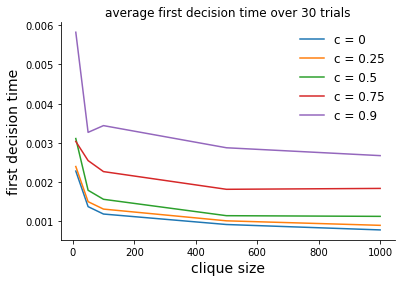

In [111]:
for i in range(len(c_array)):
    #if i%2==0:
    if i != 1:
        plt.plot(n_array,timesForC[i], label = "c = " + str(c_array[i]))
        
plt.legend(frameon = False,fontsize = 12)

#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('clique size',fontsize = 14); plt.ylabel('first decision time', fontsize = 14)
plt.title('average first decision time over ' + str(numTrials) + ' trials')

sns.despine()
saveName = 'avgFDT_' + str(numTrials) + 'trials.png'
plt.savefig(saveName,dpi = 300)